## Pipelining

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
# Loading of data

digits = datasets.load_digits()
x = digits.data
y = digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [10]:
# spliting the data into test and train
np.random.seed(100)
index = np.random.permutation(len(x))
x_train = x[index[:-50]]
y_train = y[index[:-50]]
x_test = x[index[-50:]]
y_test = y[index[-50:]]

In [3]:
# Creating the pipeline

model = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe_line = Pipeline(steps=[('pca', pca), ('logit', model)])


Text(0,0.5,'explained_variance_')

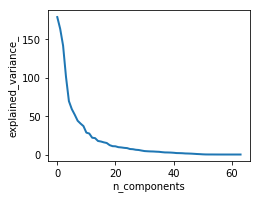

In [7]:
# plot the pca spectrum
pca.fit(x)

%matplotlib inline
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')


In [11]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:

estimators = GridSearchCV(pipe_line, dict(pca__n_components = n_components,
                                         logit__C = Cs))
estimators.fit(x_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [20, 40, 64], 'logit__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
estimators.score(x_test, y_test)

0.95999999999999996